<a href="https://colab.research.google.com/github/tharika01/ML-Projects/blob/main/Classifying_penguin_sepecies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Determining the penguin species


*   Using the Palmer's penguins dataset for training the dataset
*   This model will be trained using tensorflow's decision forest library.



Installing TensorFlow

In [ ]:
!pip install tensorflow_decision_forests

### **Importing the required libraries**

In [49]:
import tensorflow_decision_forests as tfdf
import tensorflow_datasets as tfds

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import seaborn

## **Importing the dataset**

In [65]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/JohnMount/Penguins/main/penguins.csv')

print(df.shape)
df.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


## **Determining if dataset has any null values**

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [67]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## **Grouping the penguins based on the type of species they belong to**

In [68]:
df.groupby(['species']).count() #counts values within each group

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


## **Graph of the average values**

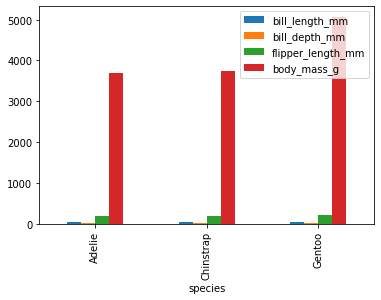

In [69]:
df.groupby('species').mean().plot(kind='bar')

### **Scatterplot denoting the classification of penguins based on the bill length, bill depth and the flipper length and body mass**

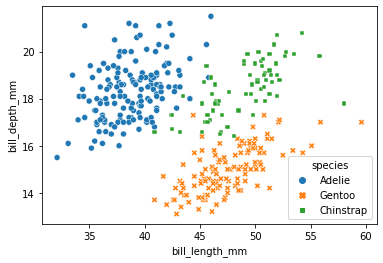

In [70]:
seaborn.scatterplot(data=df, hue= 'species',x = 'bill_length_mm', y = 'bill_depth_mm', style = 'species')

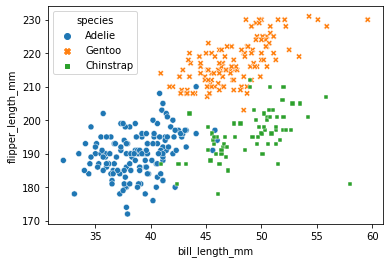

In [71]:
seaborn.scatterplot(data=df, hue= 'species',x = 'bill_length_mm', y = 'flipper_length_mm',style = 'species')

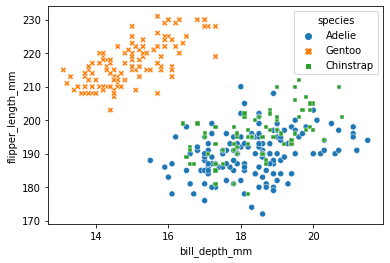

In [72]:
seaborn.scatterplot(data=df, hue= 'species',x = 'bill_depth_mm', y = 'flipper_length_mm', style = 'species')

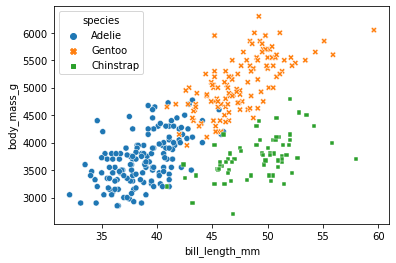

In [73]:
seaborn.scatterplot(data=df, hue= 'species',x = 'bill_length_mm', y = 'body_mass_g', style = 'species')

### **NOTE:** clearly penguins can be classified based on the bill_length and bill depth or bill_length and flipper length for a better accuracy. If bill depth and flipper length is used accuracy will be very low , pretty evident from scatterplot. 

## Data Pre-Processing

Removing the null values

In [74]:
df = df.dropna()

In [75]:
df.isnull().sum() #Hence dataset doesn't contain any null values now

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## **Encoding the categorical variable(species)**

In [78]:
label = "species"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")
df[label] = df[label].map(classes.index)

Label classes: ['Adelie', 'Gentoo', 'Chinstrap']


In [79]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,male
1,0,Torgersen,39.5,17.4,186.0,3800.0,female
2,0,Torgersen,40.3,18.0,195.0,3250.0,female
4,0,Torgersen,36.7,19.3,193.0,3450.0,female
5,0,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,2,Dream,55.8,19.8,207.0,4000.0,male
340,2,Dream,43.5,18.1,202.0,3400.0,female
341,2,Dream,49.6,18.2,193.0,3775.0,male
342,2,Dream,50.8,19.0,210.0,4100.0,male


In [80]:
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

219 examples in training, 114 examples for testing.


### **converting the pandas dataframe (`pd.Dataframe`) into tensorflow datasets (`tf.data.Dataset`)**

In [81]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

### **Train the model**

In [82]:
model = tfdf.keras.RandomForestModel(verbose = 0)
model.fit(train_ds)

## **Model Summary**

In [ ]:
model.summary()

## **Evaluating the model**

In [83]:
model.compile(metrics=["accuracy"])
eval = model.evaluate(test_ds)
print(f"Loss = {eval[0]}")
print(f"Accuracy = {eval[1] *100} %")

1/1 [==============================] - 0s 231ms/step - loss: 0.0000e+00 - accuracy: 0.9737
Loss = 0.0
Accuracy = 97.36841917037964 %


### Displaying one of the trees

In [85]:
print(classes)

['Adelie', 'Gentoo', 'Chinstrap']


In [88]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=5, max_depth=5)